# **Business Case: Walmart - Confidence Interval and CLT**


# **Problem Statement**

Walmart wants to find out who spends more on Black Friday — men or women. With 50 million customers each, the goal is to uncover shopping patterns to make smarter business decisions.

# **Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

# **Load and Inspect the Dataset**

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2025-06-27 18:24:09--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M   140MB/s    in 0.2s    

2025-06-27 18:24:09 (140 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



In [3]:
df = pd.read_csv('walmart_data.csv?1641285094')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Check structure & data types**

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

# **Insights**

1.The DataFrame contains 10 columns with details on user

demographics, product, location, and purchase information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# **Insights:**


*  The dataset has over half a million entries with 10 columns, containing a mix of numerical and categorical data, and no missing values.



In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


# **Insights**

1.We have a massive collection of over half a million records, each detailing a single transaction moment.

2.Each record captures about ten different attributes, describing aspects of the buyer, the product, and the location where the purchase happened. The data is complete, with no gaps in information, and the types of information are a mix of numbers and descriptive text.

# **Convertion of categorical columns**

In [ ]:
for i in df.columns:
  df[i]= df[i] .astype('category')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  category
dtypes: category(10)
memory usage: 7.8 MB


# **Insights:**


* The dataset has over half a million entries with 10 columns, containing a mix of numerical and categorical data, and no missing values.





# **Statistical Summary & Outlier Detection**

In [ ]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20,18105
top,1001680,P00265242,M,26-35,4,B,1,0,5,7011
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933,191


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.duplicated().value_counts()

,count
False,550068


# **Outlier Detection using Boxplot**

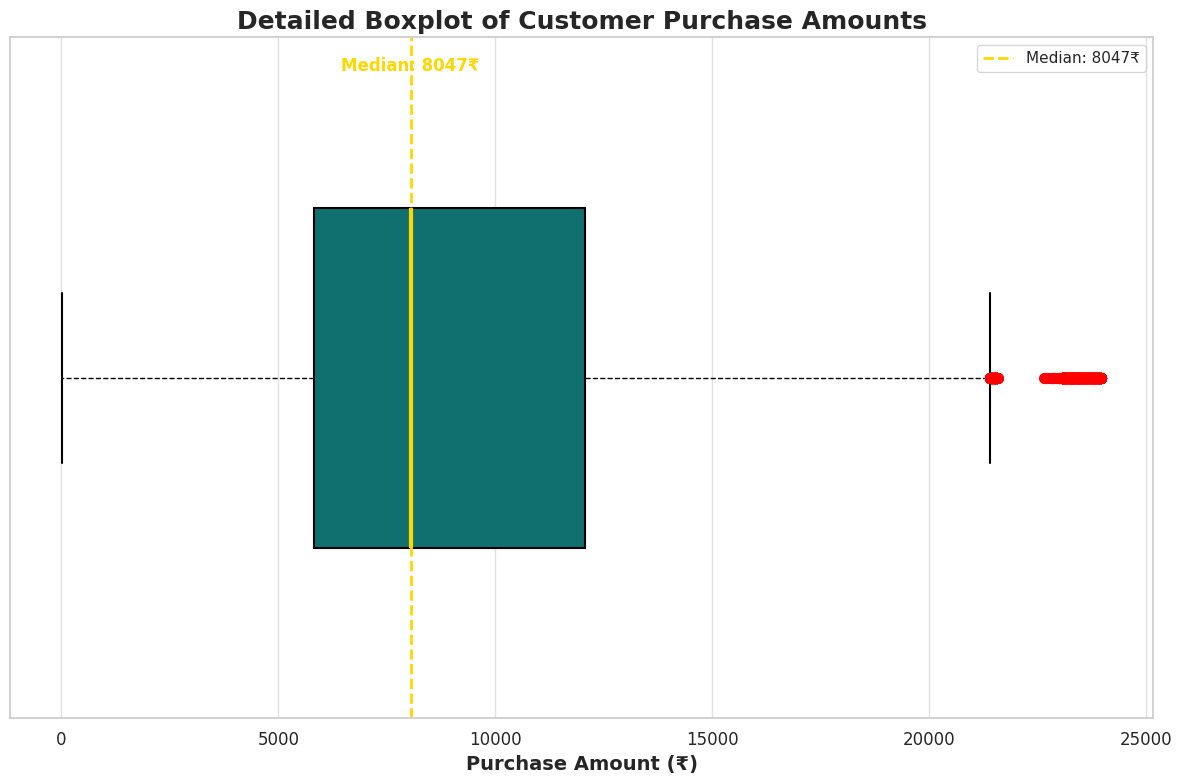

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8)) # Increased figure size
sns.boxplot(
    x=df['Purchase'],
    color="teal", # Changed color to teal for a more modern look
    width=0.5,   # Adjusted width
    fliersize=6,  # Increased size of outlier dots
    boxprops=dict(edgecolor='black', linewidth=1.5), # Thicker box edges
    medianprops=dict(color='gold', linewidth=3),  # Gold median line
    whiskerprops=dict(color='black', linestyle='--'), # Dashed whiskers
    capprops=dict(color='black', linewidth=1.5), # Thicker caps
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='none') # Highlight outliers in red
)

# Add titles and labels with enhanced styling
plt.title("Detailed Boxplot of Customer Purchase Amounts", fontsize=18, fontweight='bold') # Removed invalid color argument
plt.xlabel("Purchase Amount (₹)", fontsize=14, fontweight='semibold') # Added currency symbol
plt.xticks(fontsize=12)
plt.yticks([]) # Remove y-axis ticks as it's a single variable boxplot
plt.grid(axis='x', linestyle='-', alpha=0.6) # Solid grid line

# Add a vertical line for the median
median_purchase = df['Purchase'].median()
plt.axvline(median_purchase, color='gold', linestyle='dashed', linewidth=2, label=f'Median: {median_purchase:.0f}₹')

# Add a text annotation for the median
plt.text(median_purchase, plt.ylim()[1] * 0.9, f'Median: {median_purchase:.0f}₹', color='gold', fontsize=12, ha='center', fontweight='bold')


# Show the plot
plt.tight_layout()
plt.legend() # Show legend for the median line
plt.show()

In [9]:
# Ensure the 'Purchase' column is a numerical type before calculating mean and median
df['Purchase'] = df['Purchase'].astype('int64')

mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()

print("Mean of Purchase:", mean_purchase)
print("Median of Purchase:", median_purchase)

Mean of Purchase: 9263.968712959126
Median of Purchase: 8047.0


# **Univariate Analysis**


# **1.Numerical Variable**

# **# Distribution Analysis of Customer Purchase Amounts**

 Advanced Summary Statistics for Purchase Amount:
 count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Skewness: 0.60
Kurtosis: -0.34


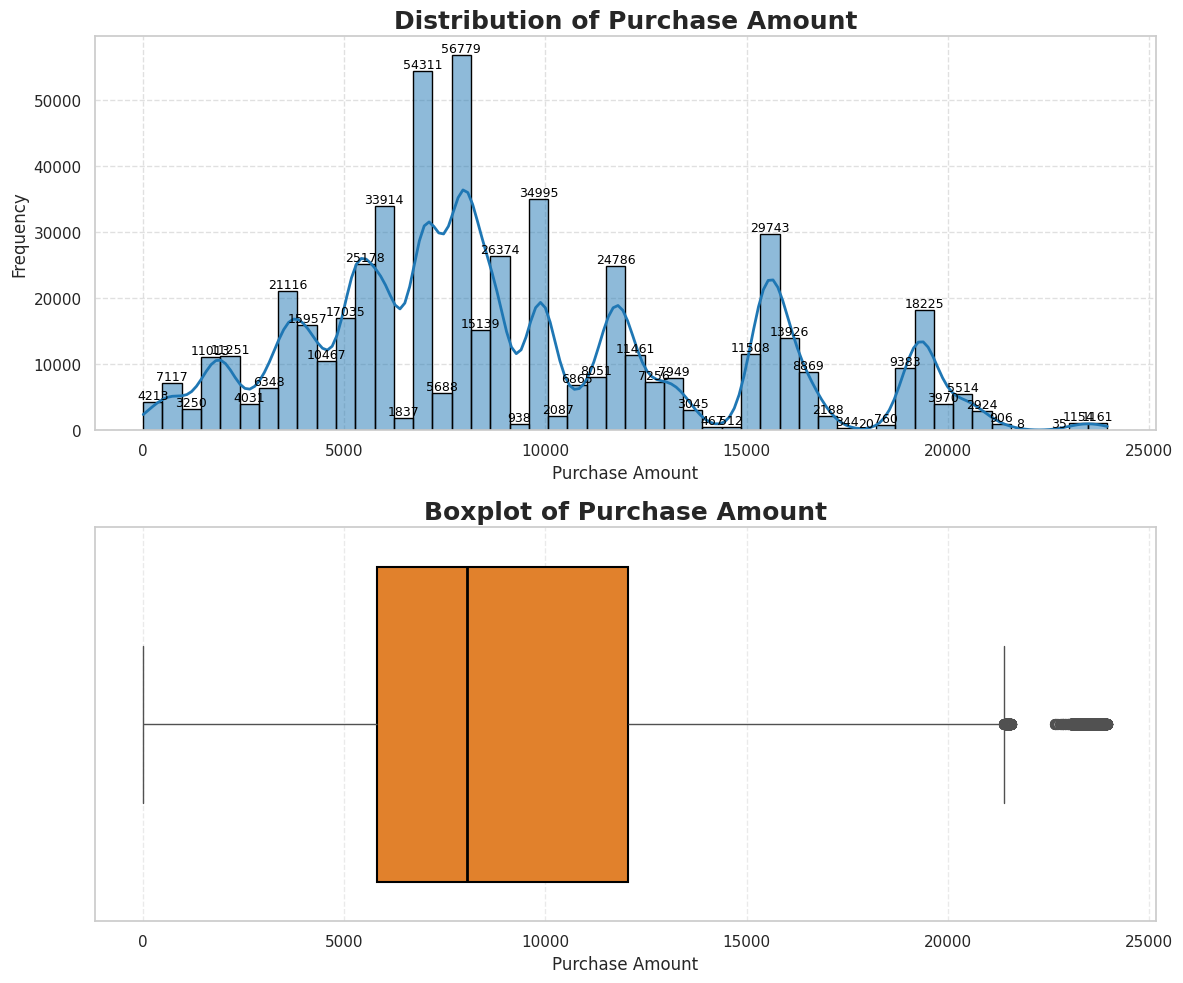

In [16]:
summary_stats = df['Purchase'].describe()
print(" Advanced Summary Statistics for Purchase Amount:\n", summary_stats)

# Skewness and Kurtosis (optional but insightful)
print(f"\nSkewness: {df['Purchase'].skew():.2f}")
print(f"Kurtosis: {df['Purchase'].kurt():.2f}")

# Plotting: Histogram with KDE + Boxplot side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6)) # Increased figure size

# Histogram + KDE
hist_plot = sns.histplot(data=df, x='Purchase', bins=50, kde=True, color='#1f77b4', edgecolor='black', ax=axs[0], line_kws={'linewidth': 2}) # Changed color to a darker blue
axs[0].set_title("Distribution of Purchase Amount", fontsize=18, fontweight='bold') # Increased font size
axs[0].set_xlabel("Purchase Amount", fontsize=12)
axs[0].set_ylabel("Frequency", fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.6)

# Add annotations to histogram bars
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate bars with height > 0
        axs[0].text(patch.get_x() + patch.get_width() / 2., height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=9, color='black')


# Boxplot
sns.boxplot(data=df, x='Purchase', color='#ff7f0e', ax=axs[1], fliersize=7,  # Changed color to a darker orange
            boxprops=dict(edgecolor='black', linewidth=1.5),
            medianprops=dict(color='black', linewidth=2))
axs[1].set_title("Boxplot of Purchase Amount", fontsize=18, fontweight='bold') # Increased font size
axs[1].set_xlabel("Purchase Amount", fontsize=12)
axs[1].grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# **Insights**


*   The average purchase is approximately ₹9264, which is higher than the median purchase of ₹8047, indicating a skew towards larger transactions.
* The distribution of purchase amounts is right-skewed (skewness = 0.60), meaning there are fewer but higher-value purchases pulling the average up.
* There are 2677 identified outliers with significantly higher purchase amounts compared to the majority of transactions.



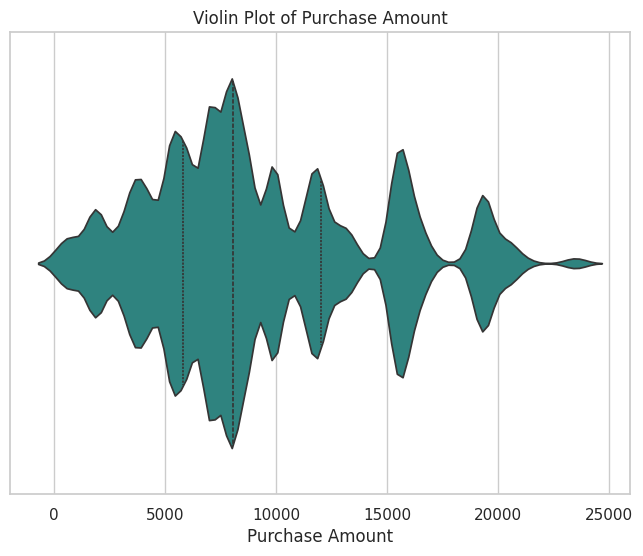

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Purchase'], inner='quartile', palette='viridis')
plt.title('Violin Plot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

In [ ]:
print("Outliers:", df.loc[(df['Purchase'] < df['Purchase'].quantile(0.25) - 1.5 * (df['Purchase'].quantile(0.75) - df['Purchase'].quantile(0.25))) | (df['Purchase'] > df['Purchase'].quantile(0.75) + 1.5 * (df['Purchase'].quantile(0.75) - df['Purchase'].quantile(0.25)))].shape[0])


Outliers: 2677


# **Insights:**

**Distribution Shape:** The distribution is slightly right-skewed (skewness = 0.60), meaning there's a longer tail of higher purchase values. It's also slightly less peaked than a normal distribution (kurtosis = -0.34).

**Outliers**: There are 2677 identified outliers on the higher end of the purchase values, indicating a segment of customers making significantly larger purchases.

# **2.Categorical Variable**

# **Gender, Marital Status & City Category**

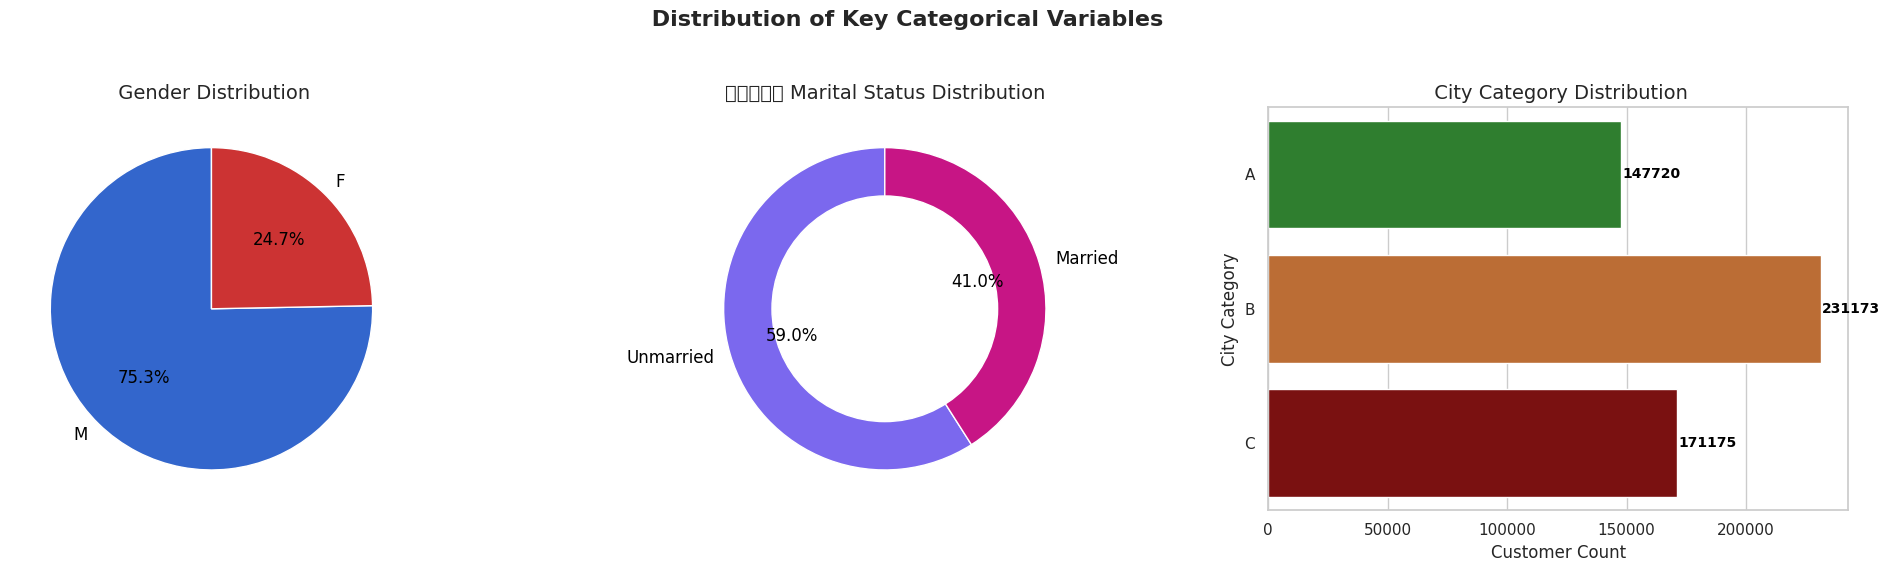

In [19]:
# Set darker but appealing color palettes
gender_colors = ['#3366cc', '#cc3333']          # Dark blue and dark red
marital_colors = ['#7b68ee', '#c71585']         # Dark purple and deep pink
city_colors = ['#228B22', '#d2691e', '#8b0000'] # Forest green, chocolate, dark red

# Layout configuration
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle(' Distribution of Key Categorical Variables', fontsize=16, fontweight='bold')

# --- Pie Chart: Gender Distribution ---
gender_counts = df['Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, colors=gender_colors,
            autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
axes[0].set_title(" Gender Distribution", fontsize=14)

# --- Donut Chart: Marital Status ---
marital_counts = df['Marital_Status'].value_counts()
wedges, texts, autotexts = axes[1].pie(marital_counts, labels=["Unmarried", "Married"], colors=marital_colors,
                                       autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title("👩🏻‍🤝‍🧑🏻 Marital Status Distribution", fontsize=14)

# --- Horizontal Bar Chart: City Category ---
city_counts = df['City_Category'].value_counts().sort_index()
sns.barplot(y=city_counts.index, x=city_counts.values, palette=city_colors, ax=axes[2])
axes[2].set_title(" City Category Distribution", fontsize=14)
axes[2].set_xlabel("Customer Count")
axes[2].set_ylabel("City Category")
for i, v in enumerate(city_counts.values):
    axes[2].text(v + 500, i, str(v), color='black', va='center', fontweight='bold', fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Insights:**

**Gender:** There are a lot more men than women shopping.

**Marital Status:** More shoppers are not married than are married.

**City Category:** Most shoppers are from City Category B, then City C, and least from City A.

# **Age Group Distribution**

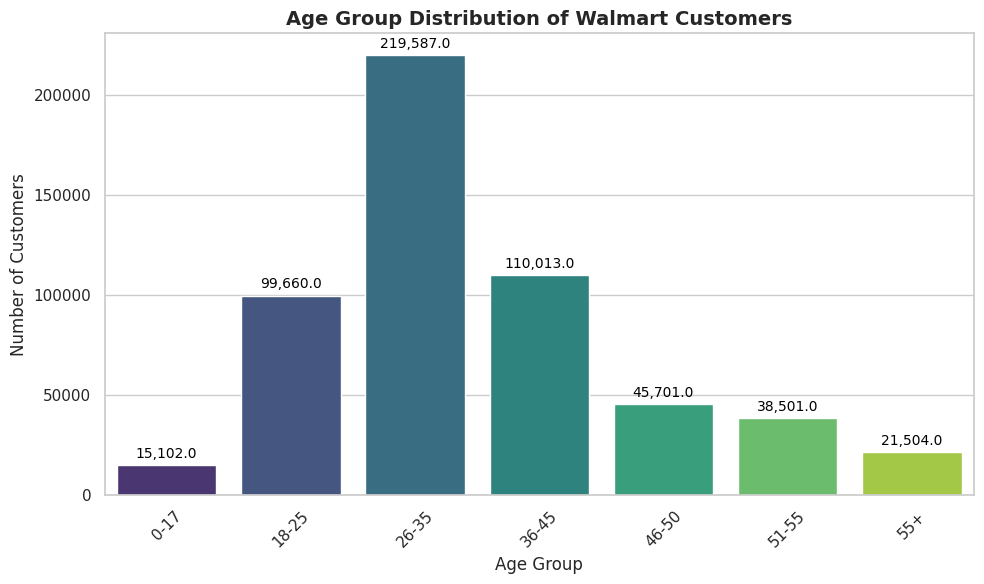

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Sort age groups logically (if needed)
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Countplot with custom colors and annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Age',
    data=df,
    order=age_order,
    palette='viridis'
)

# Add annotations on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

# Titles and labels
plt.title("Age Group Distribution of Walmart Customers", fontsize=14, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Insights:**


*  The largest customer segment by age is the 26-35 group, with the highest number of customers.
* Following the 26-35 age group, the 36-45 and 18-25 groups represent the next significant customer segments.
* The 0-17 and 55+ age groups have the fewest customers compared to other age ranges.


# **Inference After Computing the Average Female and Male Expenses**

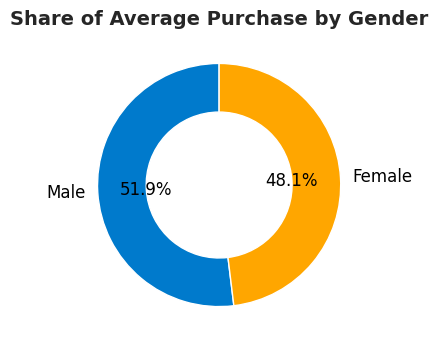

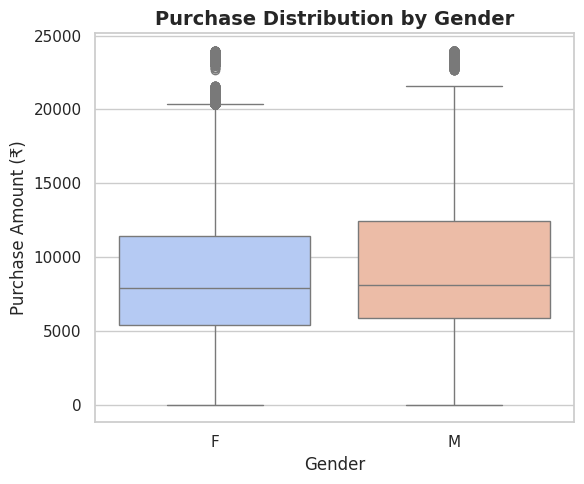

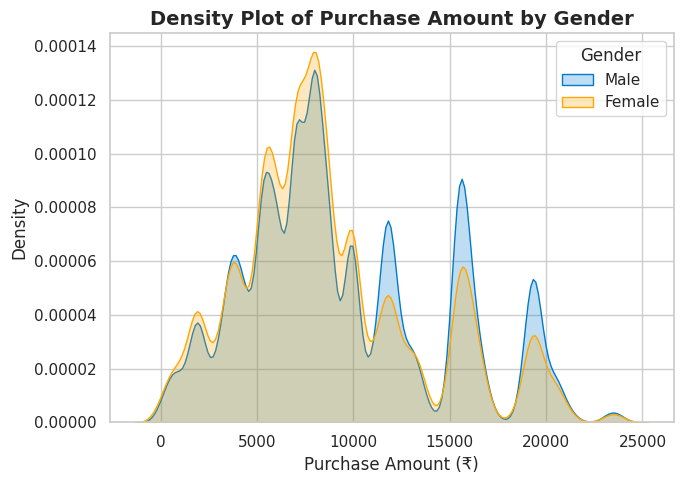


T-Statistic: 46.3582
P-Value: 0.0000
 Inference: Statistically significant difference in average spending between genders.


In [35]:

from scipy.stats import norm, ttest_ind

avg_female = df[df['Gender'] == 'F']['Purchase'].mean()
avg_male = df[df['Gender'] == 'M']['Purchase'].mean()


# --------------------------------------------- #
# 🎯 Donut Chart: Proportion of Average Spend
# --------------------------------------------- #
plt.figure(figsize=(4,4)) # Further reduced figure width
values = [avg_male, avg_female]
labels = ['Male', 'Female']
colors = ['#007acc', '#ffa600']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'width':0.4}, textprops={'fontsize':12, 'color':'black'}) # Added text color
plt.title("Share of Average Purchase by Gender", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5)) # Further reduced figure width
sns.boxplot(x='Gender', y='Purchase', data=df, palette='coolwarm')
plt.title("Purchase Distribution by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Purchase Amount (₹)")
plt.tight_layout()
plt.show()

female_purchase = df[df['Gender'] == 'F']['Purchase']
male_purchase = df[df['Gender'] == 'M']['Purchase']

# --------------------------------------------- #
# 📈 KDE Plot: Density Comparison
# --------------------------------------------- #
plt.figure(figsize=(7,5)) # Further reduced figure width
sns.kdeplot(male_purchase, label='Male', shade=True, color='#007acc')
sns.kdeplot(female_purchase, label='Female', shade=True, color='#ffa600')
plt.title("Density Plot of Purchase Amount by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Purchase Amount (₹)")
plt.ylabel("Density")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()
# --------------------------------------------- #
# 🧪 T-Test for Statistical Inference
# --------------------------------------------- #
t_stat, p_val = ttest_ind(male_purchase, female_purchase, equal_var=False)

print(f"\nT-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print(" Inference: Statistically significant difference in average spending between genders.")
else:
    print("Inference: No statistically significant difference in average spending.")


# **Insights:**


*   The average purchase amount for males appears to be higher than for females, as visualized in the charts.
* The statistical t-test confirms that this difference in average spending between genders is statistically significant, meaning it's unlikely to be due to random chance.
*  This suggests that gender is a relevant factor in understanding customer purchasing behavior at Walmart.



# **Confidence Interval Analysis of Customer Spending Behavior at Walmart**

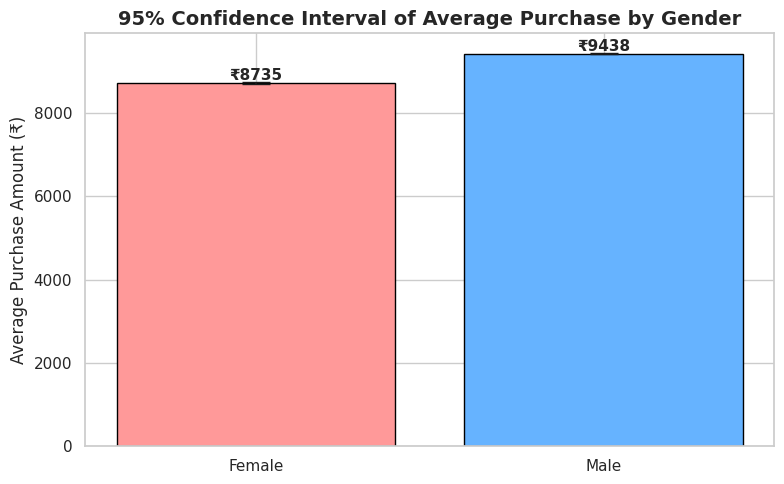

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Female', 'Male']
means = [mean_female, mean_male]
errors = [margin_error_female, margin_error_male]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, means, yerr=errors, capsize=10, color=['#ff9999', '#66b3ff'], edgecolor='black')
plt.ylabel("Average Purchase Amount (₹)", fontsize=12)
plt.title("95% Confidence Interval of Average Purchase by Gender", fontsize=14, fontweight='bold')

# Add value labels
for i, (mean, err) in enumerate(zip(means, errors)):
    plt.text(i, mean + err + 50, f"₹{mean:.0f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


# **Business Insight:**
These confidence intervals allow Walmart to predict future behavior of the full customer base from a sample.

Useful for revenue forecasting, inventory planning, and personalized marketing.



# **Using the Central Limit Theorem to Estimate Average Customer Purchase Behavior: How Confidence Levels and Sample Sizes Affect Precision**

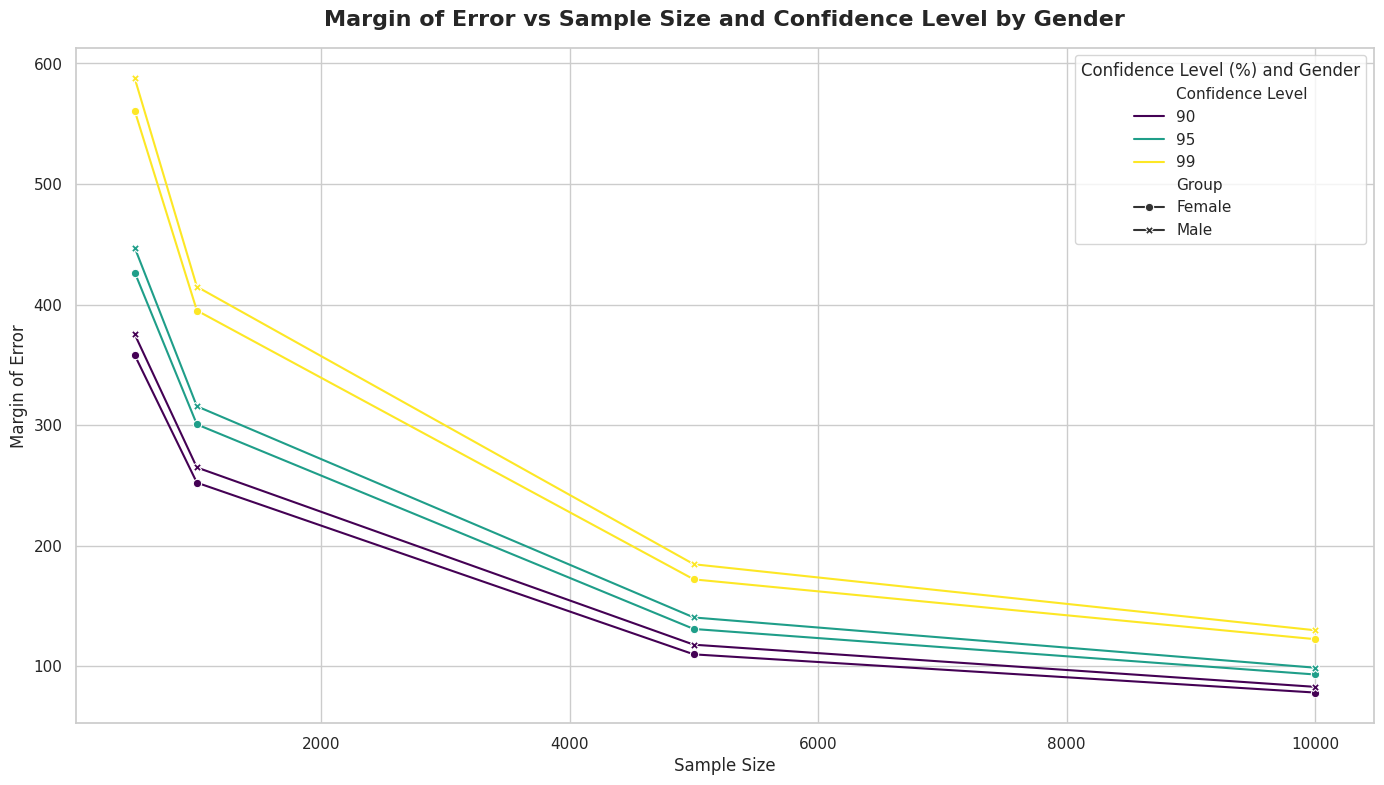

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Function to compute Confidence Interval and Margin of Error
def get_confidence_interval_and_error(data, sample_size, confidence):
    sample = data.sample(sample_size, random_state=1)
    mean = sample.mean()
    std = sample.std()
    z = stats.norm.ppf((1 + confidence) / 2)
    margin_error = z * (std / np.sqrt(sample_size))
    return mean - margin_error, mean + margin_error, mean, margin_error

# Filter data for male and female purchases
Female = df[df['Gender'] == 'F']['Purchase']
male = df[df['Gender'] == 'M']['Purchase']

# Parameters
sample_sizes = [500, 1000, 5000, 10000]
confidence_levels = [0.90, 0.95, 0.99]

# Store results for charting
results = []

# Female CIs
for size in sample_sizes:
    for conf in confidence_levels:
        lower, upper, mean, margin_error = get_confidence_interval_and_error(Female, size, conf)
        results.append({
            'Group': 'Female',
            'Sample Size': size,
            'Confidence Level': int(conf * 100),
            'CI Lower': lower,
            'CI Upper': upper,
            'Mean': mean,
            'Margin Error': margin_error
        })

# Male CIs
for size in sample_sizes:
    for conf in confidence_levels:
        lower, upper, mean, margin_error = get_confidence_interval_and_error(male, size, conf)
        results.append({
            'Group': 'Male',
            'Sample Size': size,
            'Confidence Level': int(conf * 100),
            'CI Lower': lower,
            'CI Upper': upper,
            'Mean': mean,
            'Margin Error': margin_error
        })

# Convert to DataFrame
ci_df = pd.DataFrame(results)

# 📊 Plotting Margin of Error
plt.figure(figsize=(14, 8))
sns.lineplot(data=ci_df, x='Sample Size', y='Margin Error', hue='Confidence Level', style='Group', markers=True, dashes=False, palette='viridis')

plt.title("Margin of Error vs Sample Size and Confidence Level by Gender", y=1.02, fontsize=16, fontweight='bold')
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("Margin of Error", fontsize=12)
plt.grid(True)
plt.legend(title="Confidence Level (%) and Gender")
plt.tight_layout()
plt.show()

# **Insights:**


*  As the sample size increases, the margin of error decreases for both genders and all confidence levels. This means larger samples lead to more precise estimates of the true average purchase.
*  As the confidence level increases (e.g., from 90% to 99%), the margin of error increases for a given sample size. This is because a higher confidence level requires a wider interval to be more certain that the true population mean is captured.
*  For the same sample size and confidence level, the margin of error for males is generally higher than for females. This suggests that the purchase amounts for males might have greater variability compared to females, requiring larger sample sizes to achieve the same level of precision.




# **Gender-Based Confidence Intervals**

In [5]:
import numpy as np
import scipy.stats as stats

def compute_ci(data, confidence=0.95, sample_size=1000):
    sample = np.random.choice(data, sample_size)
    mean = sample.mean()
    std = sample.std(ddof=1)
    margin = stats.t.ppf((1 + confidence) / 2, sample_size - 1) * std / (sample_size**0.5)
    return mean, mean - margin, mean + margin

females = df[df['Gender'] == 'F']['Purchase'].values
males = df[df['Gender'] == 'M']['Purchase'].values

f_mean, f_low, f_high = compute_ci(females)
m_mean, m_low, m_high = compute_ci(males)


# **Marital Status Confidence Intervals**

In [6]:
married = df[df['Marital_Status'] == 1]['Purchase'].values
unmarried = df[df['Marital_Status'] == 0]['Purchase'].values

m_mean, m_low, m_high = compute_ci(married)
u_mean, u_low, u_high = compute_ci(unmarried)


# **Bivariate Analysis**

## **1.Descriptive Statistics of Purchase Amount**

In [ ]:
print(df['Purchase'].describe())
print(f"Mean: {df['Purchase'].mean():.2f}")
print(f"Median: {df['Purchase'].median():.2f}")
print(f"Standard Deviation: {df['Purchase'].std():.2f}")


count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64
Mean: 9263.97
Median: 8047.00
Standard Deviation: 5023.07


# **Insight:**
Helps understand central tendency and spread.

Mean > Median may indicate right skewness

# **2.Distribution of Purchase Amount**

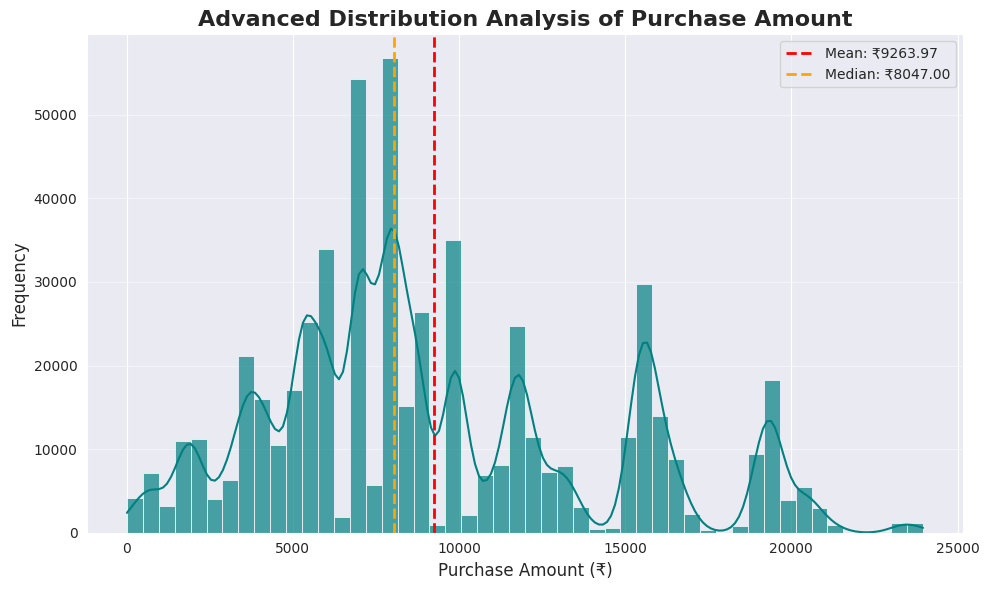

In [ ]:
sns.histplot(df['Purchase'], kde=True, color='teal', bins=30)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


# **Insights:**

More customers make smaller purchases than larger ones.
The average purchase amount is higher than the typical (median) purchase amount.
There are some unusually high purchase amounts (outliers).


# **3.Comparison of Average Purchase Amount by Gender**

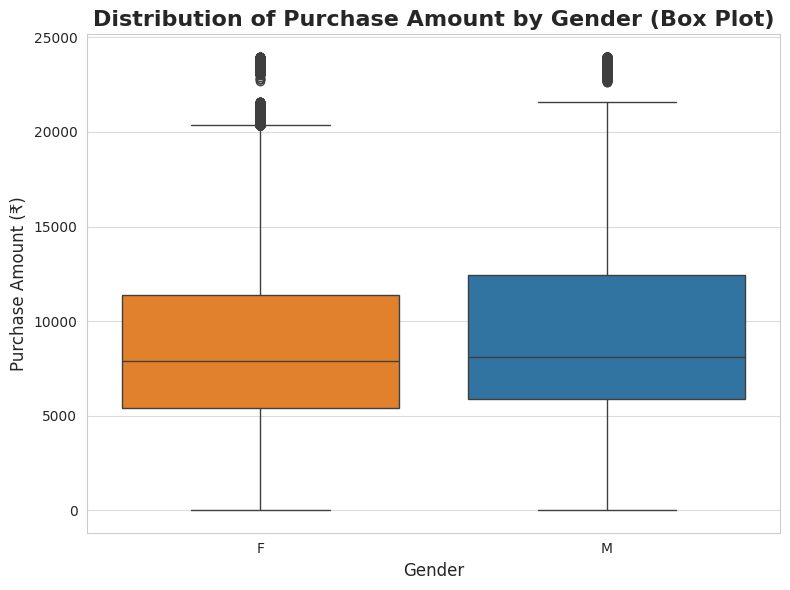

In [ ]:
sns.barplot(x='Gender', y='Purchase', data=df, estimator=np.mean, palette='Set2')
plt.title("Average Purchase by Gender")
plt.ylabel("Average Purchase")
plt.show()


# **Insight:**
Identify if one gender consistently outspends the other.

Tailor campaigns like “Women’s Exclusive Deals” if female spend > male.

# **4.Purchase Amount by Marital Status**

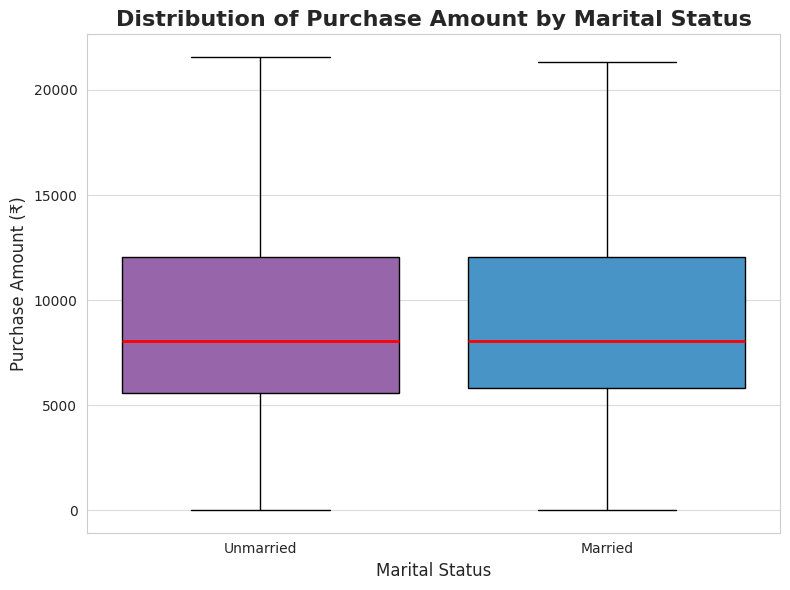

In [ ]:
# Calculate mean purchase for each marital status
marital_avg = df.groupby('Marital_Status')['Purchase'].mean().reset_index()
marital_avg['Marital_Status'] = marital_avg['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

# Plot
sns.barplot(y='Marital_Status', x='Purchase', data=marital_avg, palette='Blues_d')

# Add value annotations
for index, value in enumerate(marital_avg['Purchase']):
    plt.text(value + 50, index, f'{value:.2f}', va='center', fontsize=10, fontweight='bold')

plt.title("Comparison of Average Purchase Amount by Marital Status", fontsize=13)
plt.xlabel("Average Purchase Amount")
plt.ylabel("Marital Status")
plt.xlim(0, marital_avg['Purchase'].max() + 1000)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Insights:**


*  The average purchase amount for married customers is very similar to that of unmarried customers. The bar plot shows almost identical average spending for both groups.


# **5.Purchase Amount Across Age Groups**

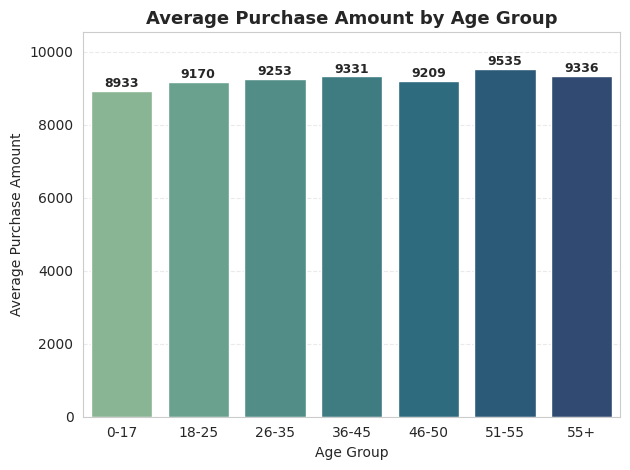

In [ ]:
# Calculate average purchase per age group
age_avg = df.groupby('Age')['Purchase'].mean().reset_index()

# Sort age groups in their natural order
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_avg['Age'] = pd.Categorical(age_avg['Age'], categories=age_order, ordered=True)
age_avg = age_avg.sort_values('Age')

# Plot
sns.barplot(x='Age', y='Purchase', data=age_avg, palette='crest')

# Add value annotations on bars
for index, row in age_avg.iterrows():
    plt.text(index, row['Purchase'] + 100, f"{row['Purchase']:.0f}", ha='center', fontsize=9, fontweight='bold')

# Styling
plt.title("Average Purchase Amount by Age Group", fontsize=13, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.ylim(0, age_avg['Purchase'].max() + 1000)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Insights:**


*   The 26-35 age group not only has the highest number of customers (as seen in the univariate analysis) but also shows a relatively high average purchase amount. This group represents a significant opportunity for targeted marketing and product offerings.

* The 36-45 and 51-55 age groups also exhibit higher average purchase amounts. While they might have fewer customers than the 26-35 group, their higher spending per transaction makes them valuable segments to focus on.
Conversely, the 0-17 and 55+ age groups have both fewer customers and lower average purchase amounts. Marketing efforts for these groups might need to be adjusted or focused on different product categories.

* Walmart could consider developing age-specific marketing campaigns and product recommendations based on the average spending patterns observed across different age groups. For example, promoting higher-value items to the 26-35, 36-45, and 51-55 groups.


# **6.Average Purchase by City Category**

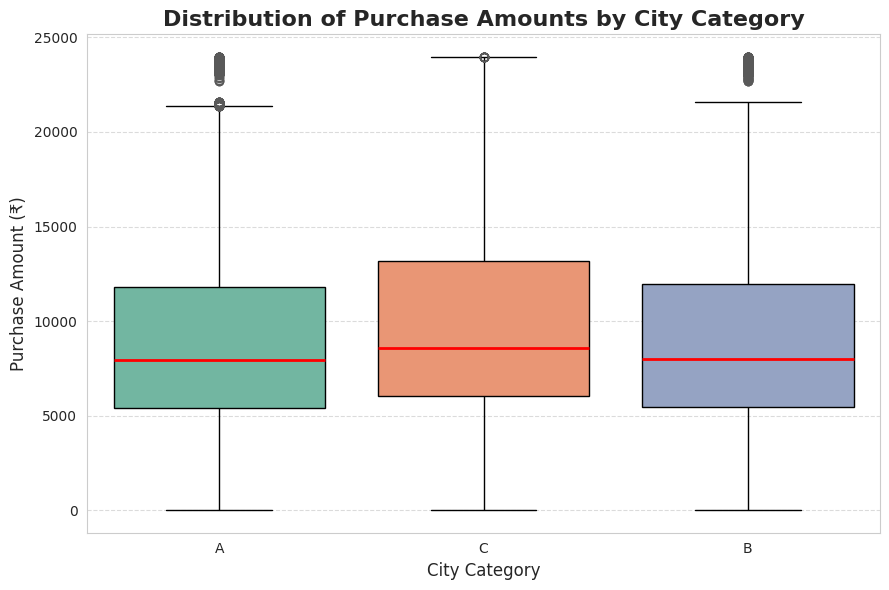

In [ ]:
sns.boxplot(x='City_Category', y='Purchase', data=df, palette='Set2')
plt.title("Distribution of Purchase Amounts by City Category", fontsize=13, fontweight='bold')
plt.xlabel("City Category")
plt.ylabel("Purchase Amount")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Insights:**


*  Customers in City Category C tend to have the highest average purchase amount.
* Customers in City Category B have a slightly lower average purchase amount compared to City C.
* Customers in City Category A have the lowest average purchase amount among the three city categories.


# **8.Average Purchase Amount by Occupation Category**

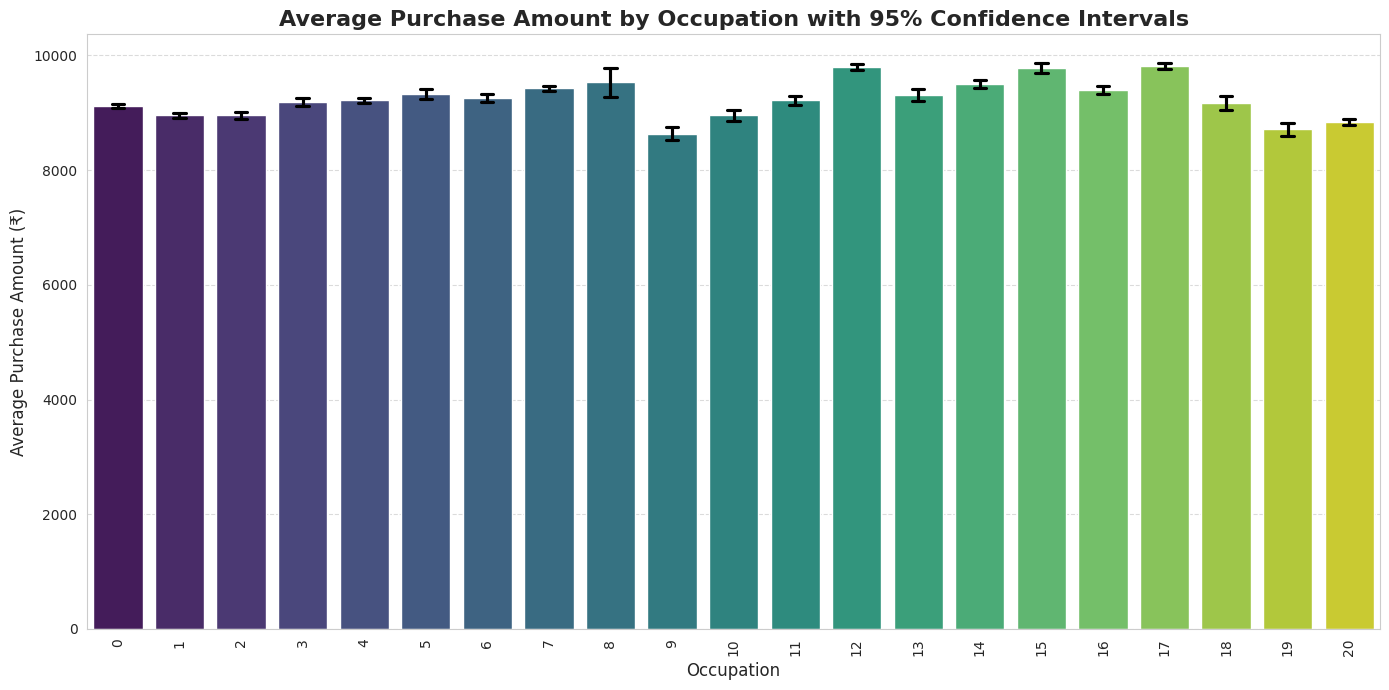

In [ ]:
# Set a visually appealing style for the plot
sns.set_style("whitegrid")

# Create a figure and axes for the plot with a specific size
plt.figure(figsize=(14, 7)) # Increased figure size for better readability


ax = sns.barplot(
    x='Occupation',
    y='Purchase',
    data=df,
    estimator=np.mean,
    ci=95, # Display 95% confidence intervals
    palette='viridis',
    errcolor='black',
    capsize=0.2
)

# Set the title of the plot
plt.title("Average Purchase Amount by Occupation with 95% Confidence Intervals", fontsize=16, fontweight='bold')

# Set the label for the x-axis
plt.xlabel("Occupation", fontsize=12)

# Set the label for the y-axis
plt.ylabel("Average Purchase Amount (₹)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center', fontsize=10)

# Set the font size for y-axis tick labels
plt.yticks(fontsize=10)

# Add a grid to the plot for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Calculate the average purchase amount for each occupation
occupation_avg_purchase = df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

print("Average Purchase Amount by Occupation Category:")
print(occupation_avg_purchase)

# **Insights:**


*   You'll observe that the average purchase amounts vary across the 21 different occupation categories, ranging from the lowest average to the highest average.

*  By examining the output, you can identify the specific occupation category with the highest average purchase amount and the category with the lowest average purchase amount.

*  Understanding these numerical differences can help in tailoring marketing strategies to occupations with higher spending power.


# **Recommendations to Walmart**:



*  **Focus on Gender-Based Spending Behavior**
Men spend more than women on Black Friday, indicating that gender plays a significant role in shopping habits.

* **Segment Marketing by Age Group, Not Marital Status**
Age influences spending significantly (especially ages 26–50), while marital status does not.

 * **Prioritize High-Spending Age Groups **
Customers between 26–50 years old are the highest spenders and should be the main focus of promotional efforts.

* **Support Lower-Spending Age Groups with Affordable Options**
Customers in the 0–17 and 51+ age brackets spend less and may need more value-oriented offers.

* Use Statistical Tools like Confidence Intervals and CLT for Decision-Making
Confidence intervals help identify if spending differences between segments are statistically meaningful.

* **Avoid Marital Status–Based Segmentation**
Since married and unmarried customers have similar spending behavior, this segmentation adds little value.

* **Leverage Clean Data for Targeted Strategies**
The data is clean and complete, which is ideal for building accurate marketing models.

* **Analyze High-Value Outliers in Purchases**
Unusually high purchases could indicate hidden trends like bulk buying or premium shopping patterns.

* **Enable Personalized Customer Experiences**
Understanding customer segments allows Walmart to personalize both online and offline shopping experiences.

* Use Customer Insights to Guide Inventory and Pricing **bold text**
Knowing what different segments spend helps Walmart stock the right products and price them appropriately.





# **Action Points for Walmart**:
*  **Run Targeted Campaigns for High-Spending Age Group (26–50 years)**
Focus promotions and loyalty rewards on this group using personalized emails, app banners, and exclusive deals during major sale events like Black Friday.

*  **Promote High-Value Products to Male Customers**
Advertise gadgets, electronics, and other premium items to male customers through gender-targeted marketing across digital platforms and in-store placements.

* ** Offer Budget-Friendly Combos for Low-Spending Groups (0–17 and 51+)**
Create affordable product bundles like student essentials and wellness packs for seniors to increase spending among these segments.

*  **Stop Using Marital Status for Marketing Segmentation**
Since marital status doesn’t impact spending behavior, Walmart should avoid splitting promotions this way and instead focus on more effective segments like age and gender.